<a href="https://colab.research.google.com/github/sgywhetstone/CholletDLWorkbooks/blob/master/CholletC3HouseReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple regression model from Chollet C3.6. Trained on a small dataset (506, 404 training, 102 test)

In [0]:
#Variables
num_k_fold = 4
num_epochs = 500

In [2]:
#Import datasets
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [0]:
#Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [0]:
#Build network
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu',
                        input_shape= (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [6]:
#Prepare model with k-fold validation
import numpy as np

num_val_samples = len(train_data) // num_k_fold
all_mae_histories =[]

for i in range(num_k_fold):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate(
    [train_data[:i*num_val_samples],
     train_data[(i+1) *num_val_samples:]],
     axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i*num_val_samples],
     train_targets[(i+1)*num_val_samples:]],
     axis=0)
  print(i)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets), 
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  print(i)

processing fold # 0
0
0
processing fold # 1
1
1
processing fold # 2
2
2
processing fold # 3
3
3


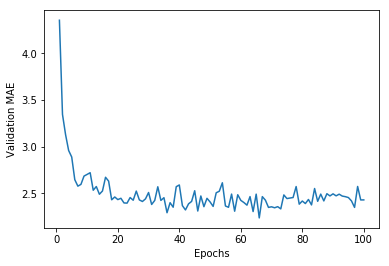

In [7]:
#Plotting average validation scores by epoch
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+ 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

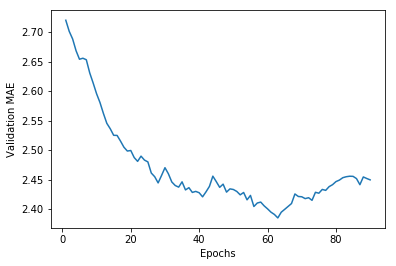

In [8]:
#Replot with smoothing

def smooth_curve(points, factor=.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else: smoothed_points.append(point)
  return smoothed_points

smooth_mae_history= smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

                       

In [10]:
#Retraining model to 80 epochs

model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

#Print final avg error
print(test_mae_score)

102/102 [==============================] - 0s 891us/step
2225.8892702588846
